In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/Aman/Downloads/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# data of capstone Telco-Customer-Churn
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.isnull().sum()
# No null data 
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

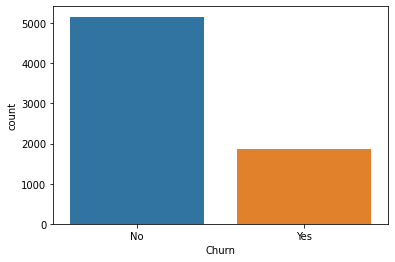

In [8]:
sns.countplot(data=df, x="Churn")

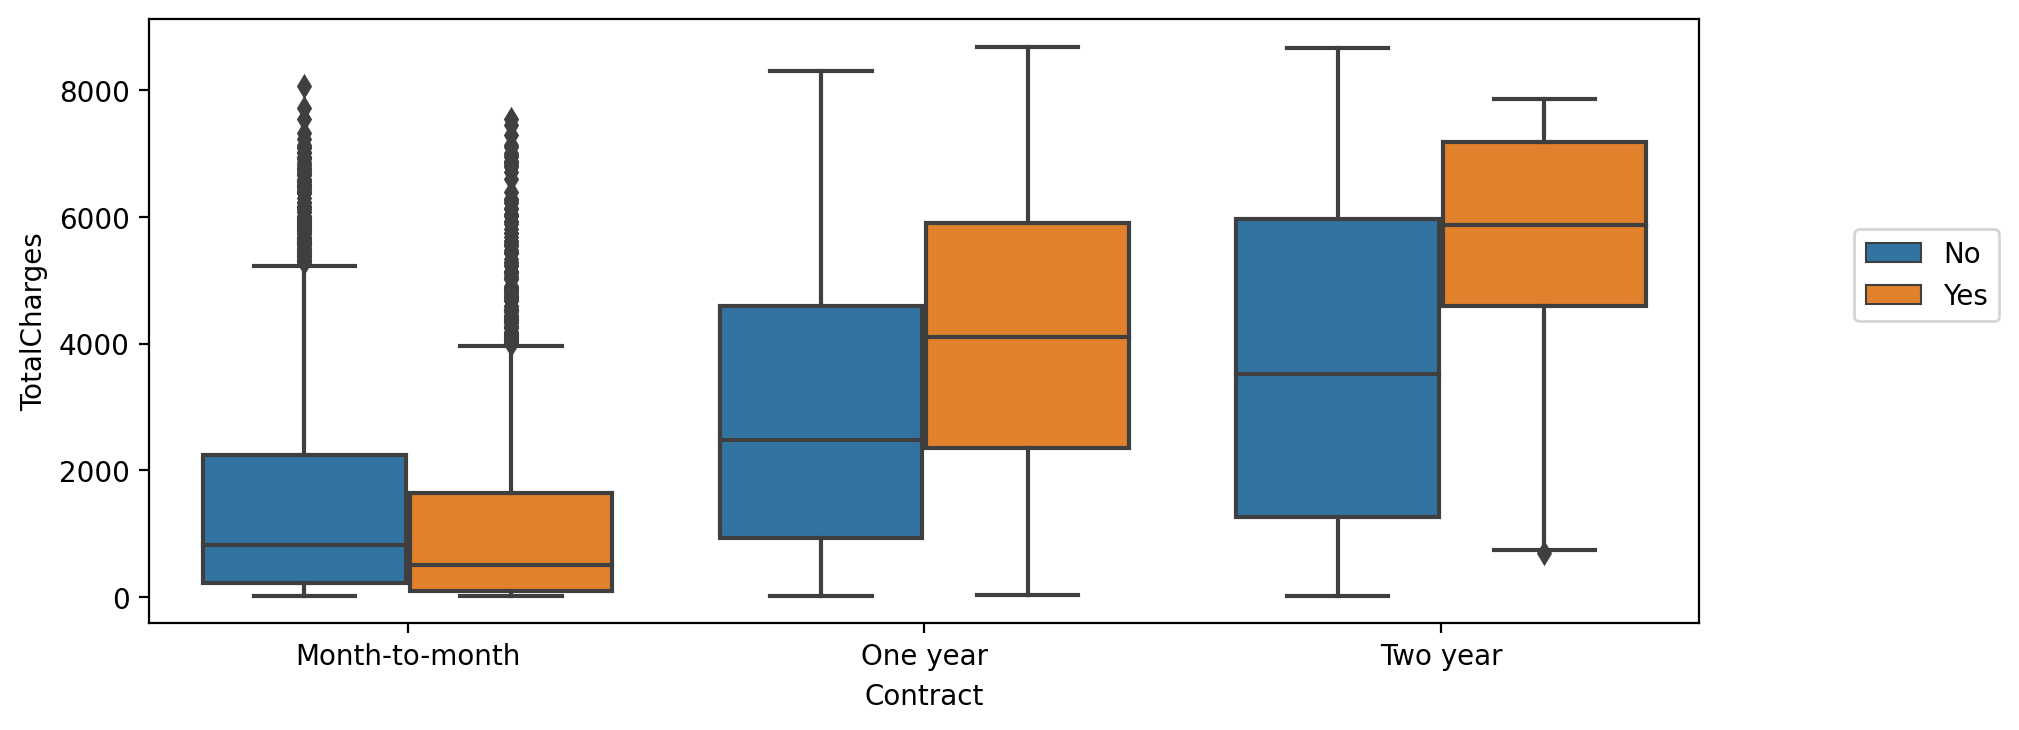

In [9]:
# creat box plot of total charges per contract type
plt.figure(figsize=(10,4), dpi=200)
sns.boxplot(data =df, y='TotalCharges', x="Contract", hue ="Churn")
plt.legend(loc=(1.1,0.5))
# as you can see on two year stay the more charges  

In [10]:
# select the same data type
object_df=df.select_dtypes(include="object")
numeric_df=df.select_dtypes(exclude="object")
numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7027,0,24,84.80,1990.50
7028,0,72,103.20,7362.90
7029,0,11,29.60,346.45
7030,1,4,74.40,306.60


In [11]:
#df.customerID.unique()
len(pd.unique(df['customerID']))


7032

In [12]:
df.shape

(7032, 21)

In [13]:
#Getting dummies value for categorical data
corr_df= pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',"Churn"]]).corr()
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [14]:
a=corr_df["Churn_Yes"].sort_values().iloc[1:-1]

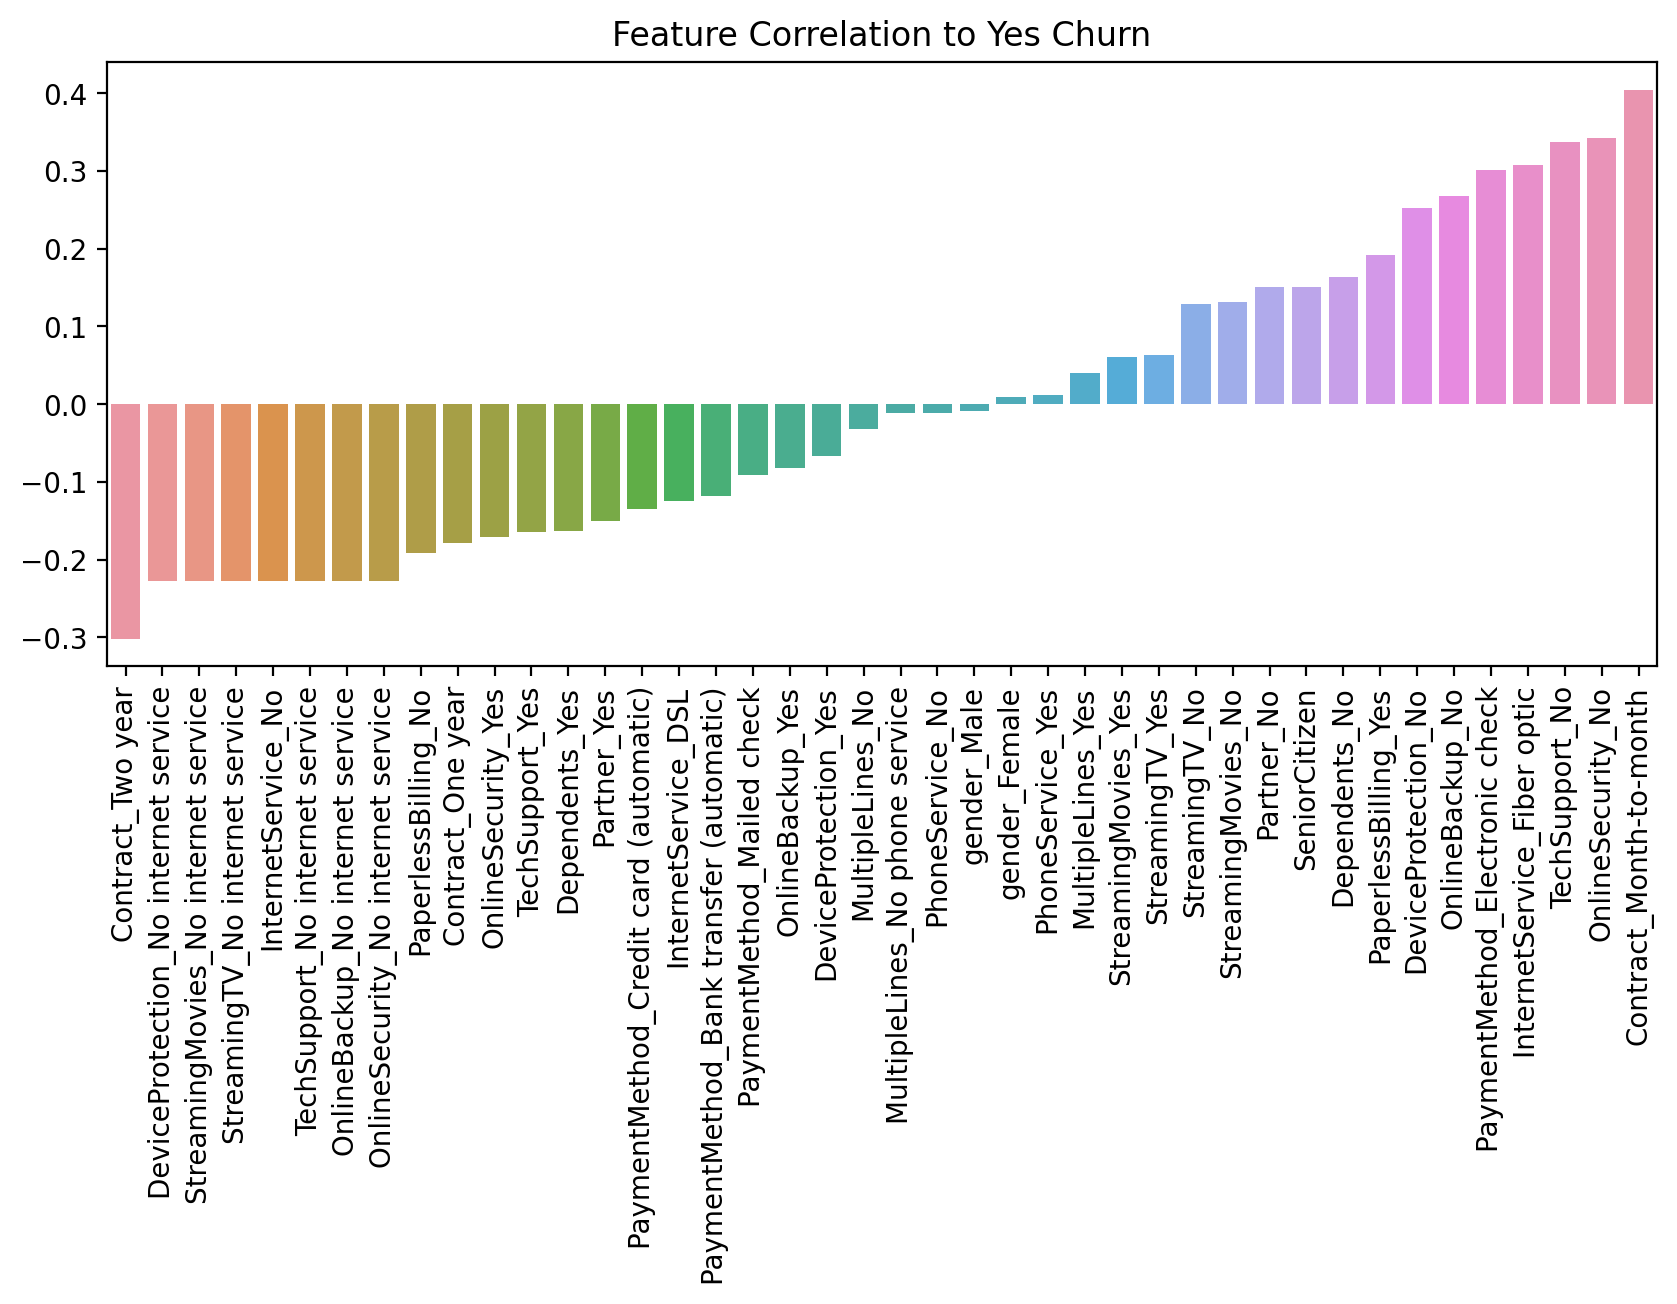

In [15]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(x=a.index,y=a.values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

In [17]:
#Churn analysis
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

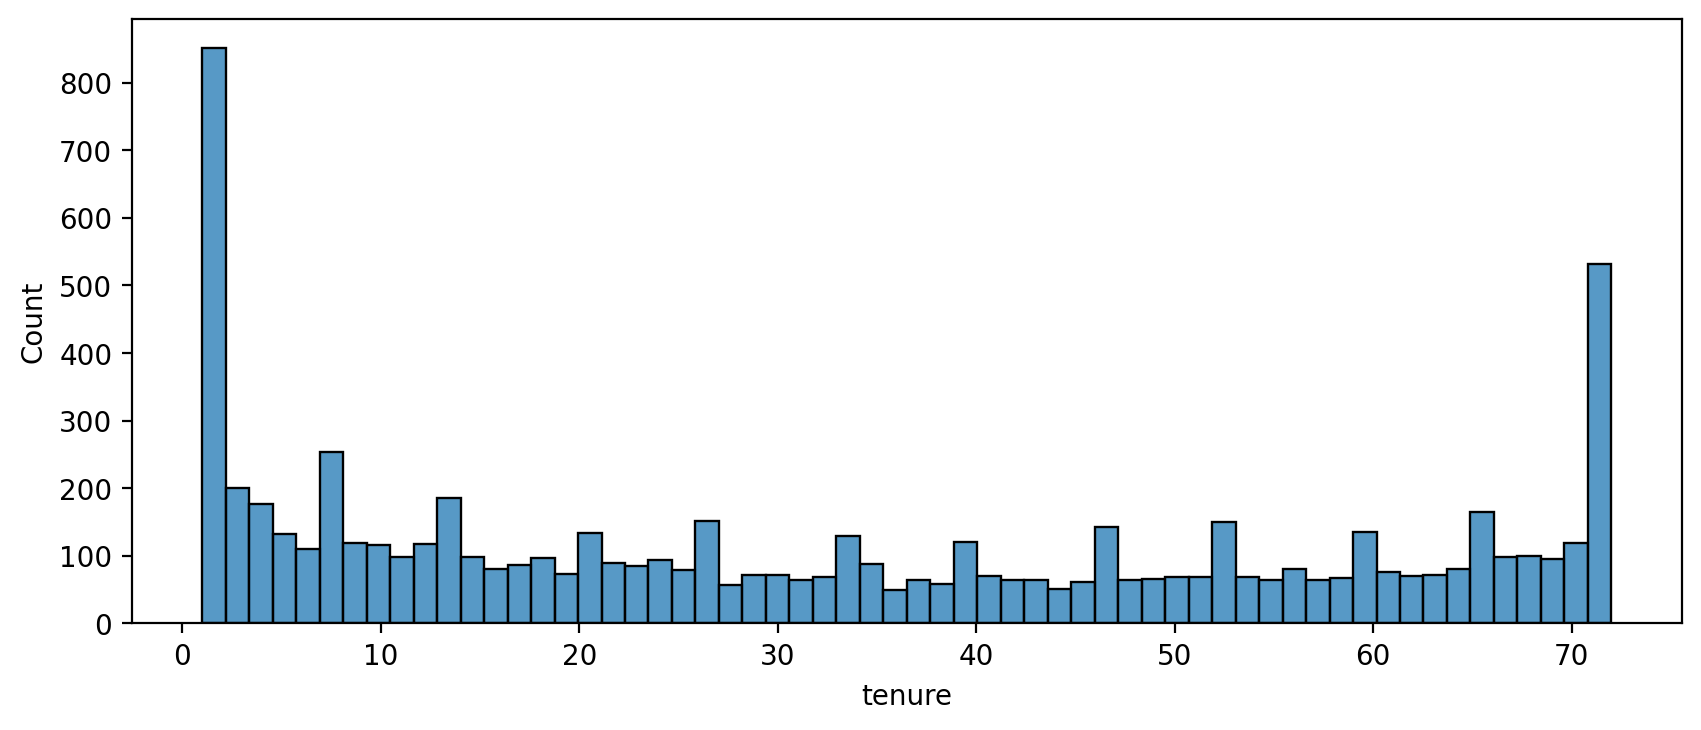

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

<Figure size 2000x600 with 0 Axes>

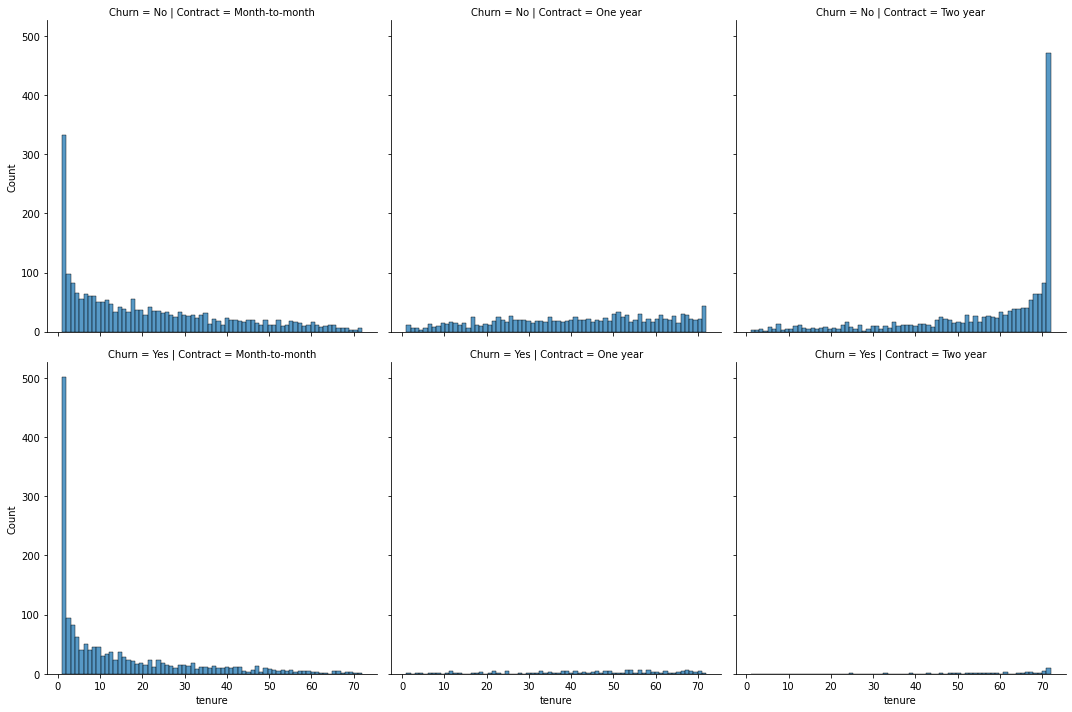

In [19]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

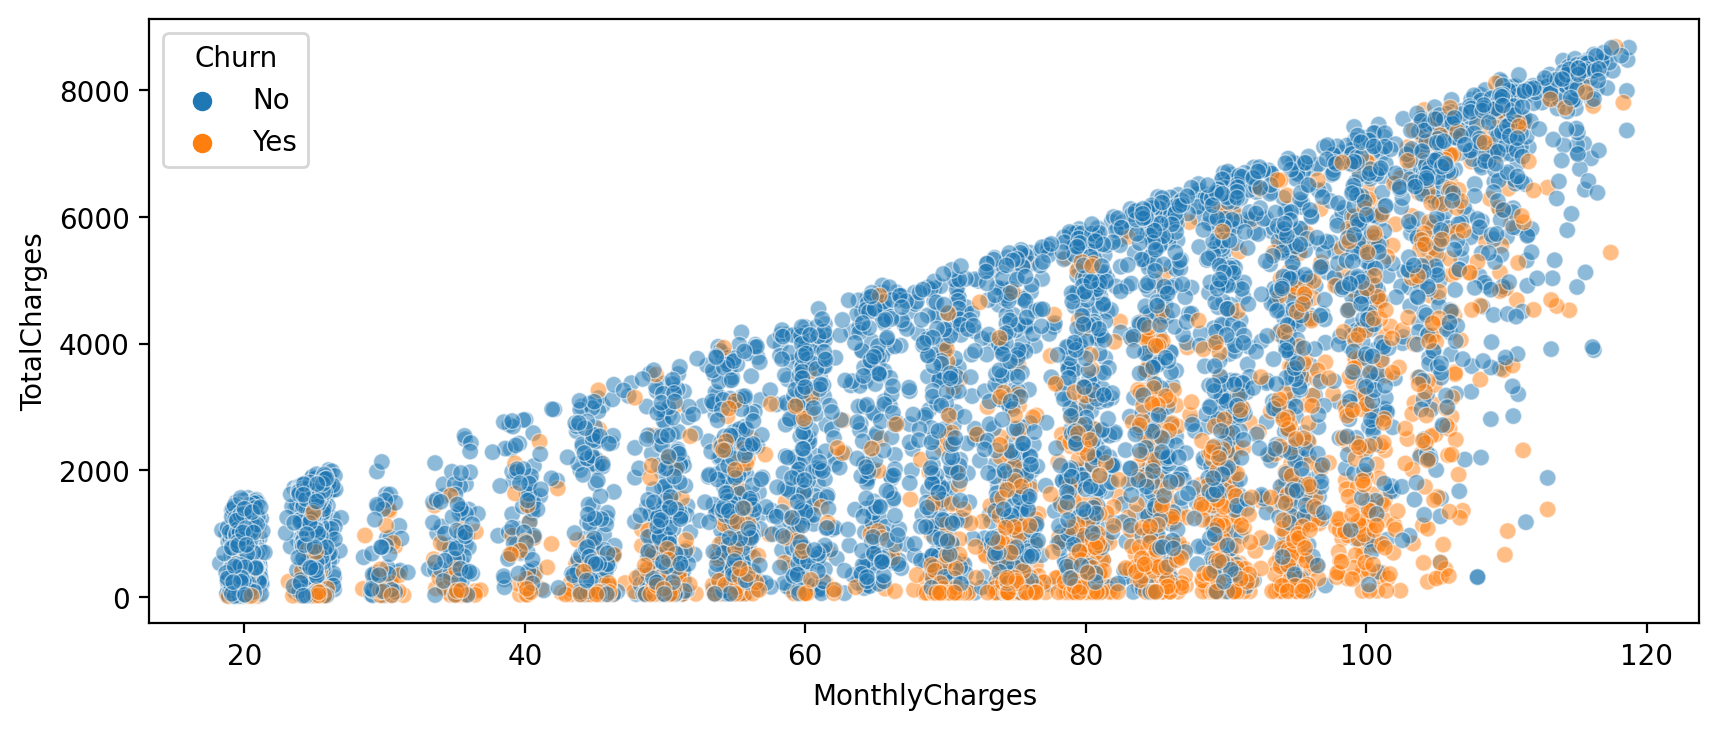

In [20]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5)

In [21]:
# creat churn 
no_churn =df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [22]:
churn_rate=100*yes_churn/(no_churn+yes_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

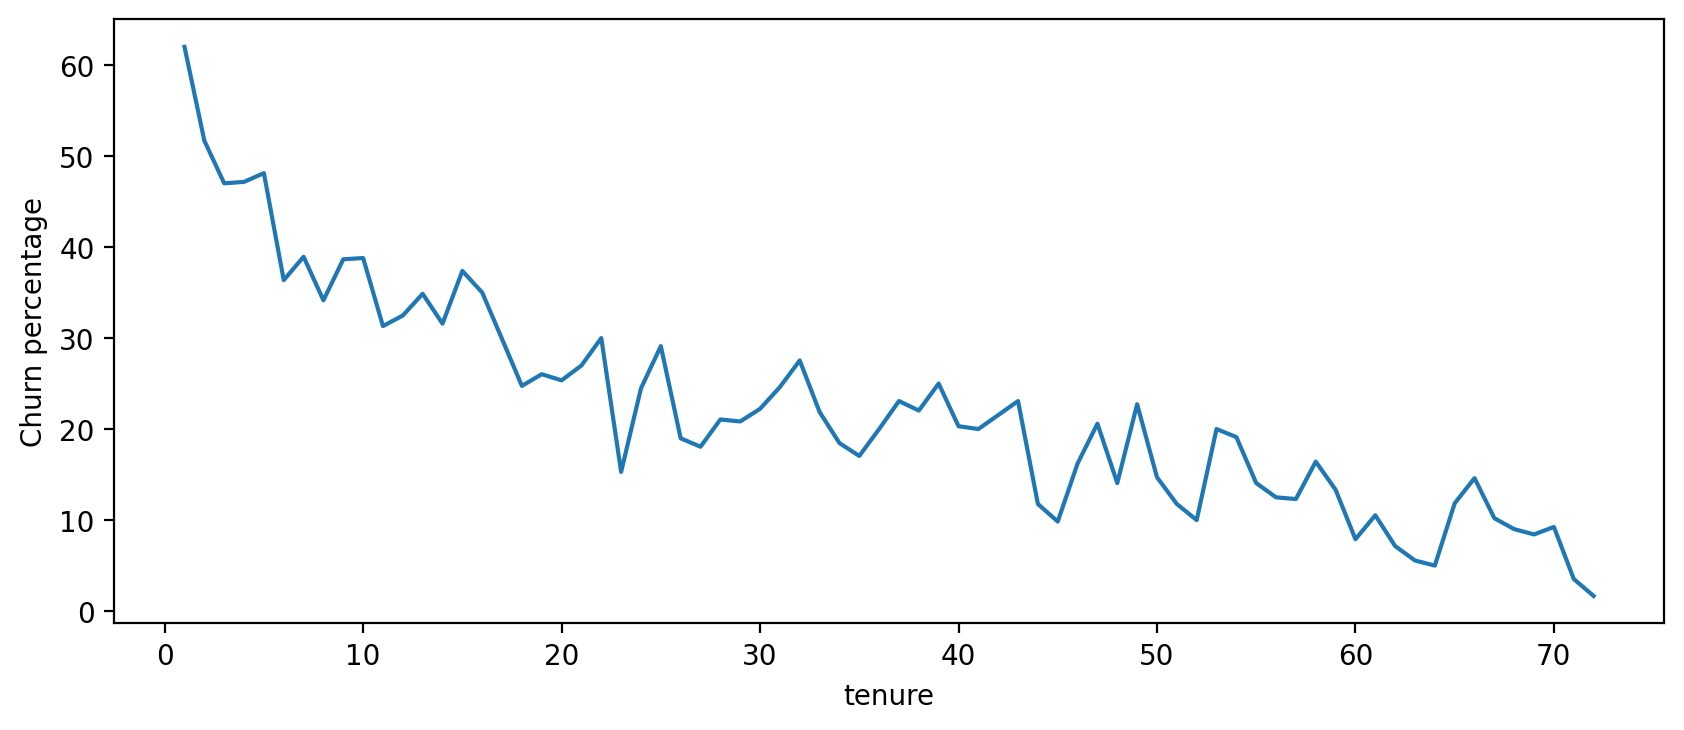

In [23]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn percentage');

In [25]:
# making another column
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"
df["Tenure_cohort"]=df['tenure'].apply(cohort) 
df.head(10)[["tenure","Tenure_cohort"]]

,tenure,Tenure_cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

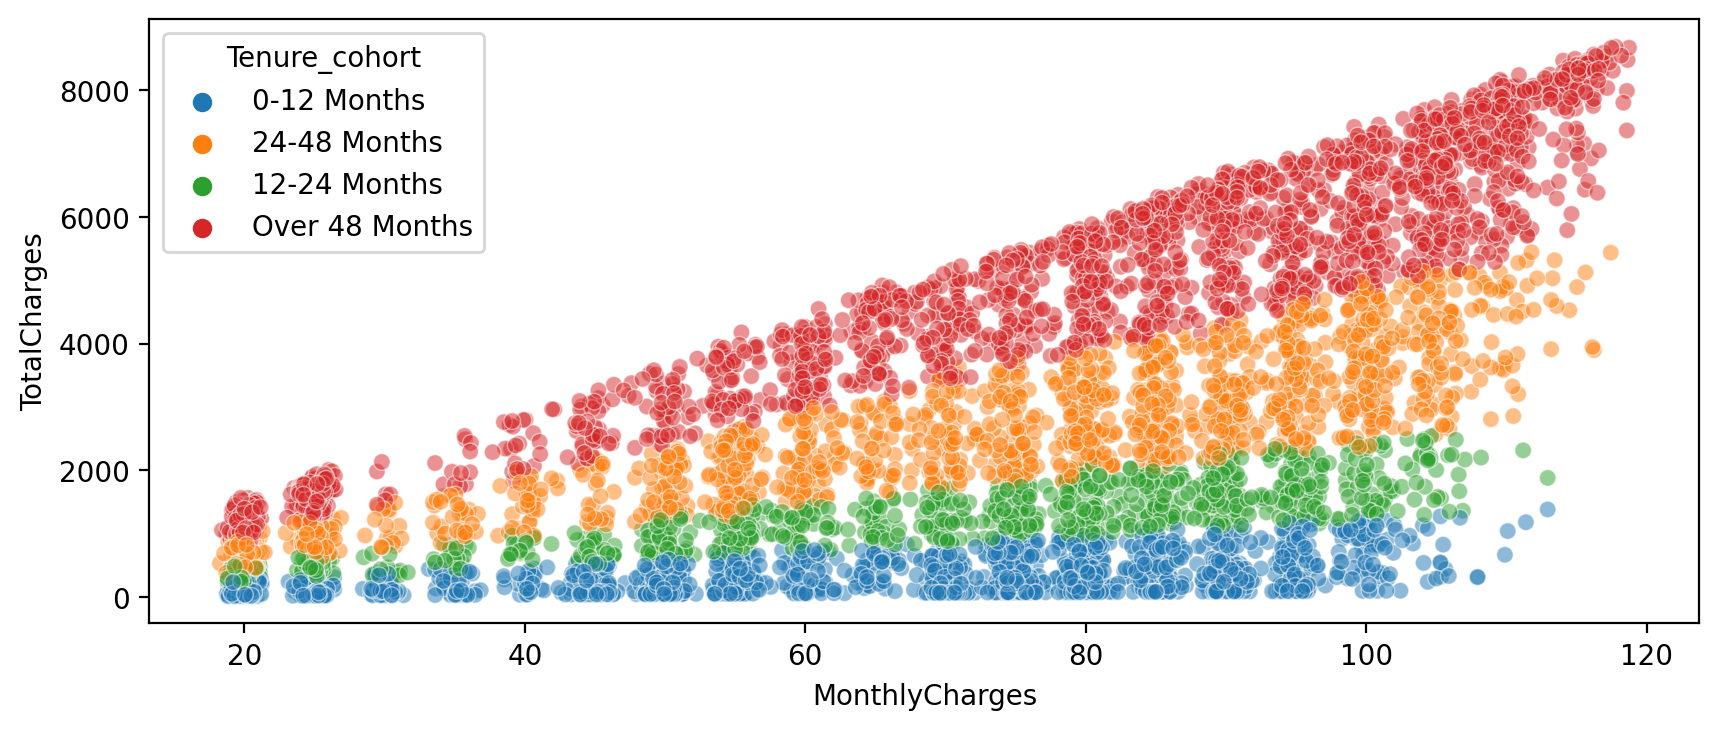

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure_cohort', linewidth=0.5,alpha=0.5)

In [29]:
# Predictive Modeling on tree based mothod
# Single Decision Tree

# separate the X feature and y label

X= df.drop(['Churn','customerID'], axis=1)
X=pd.get_dummies(X, drop_first=True)
y=df['Churn']

In [30]:
y.head()
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_cohort_12-24 Months,Tenure_cohort_24-48 Months,Tenure_cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [31]:
# spliting the train and test data  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [32]:
# scaling the X data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [40]:
metrices = pd.DataFrame(columns=['model' ,'score',])

In [35]:
models=[
        RandomForestClassifier(n_estimators = 50, criterion = 'entropy',random_state=0),
        
        LogisticRegression(random_state=0),
        SVC(random_state=0),
        DecisionTreeClassifier(random_state = 0),
        KNeighborsClassifier(),
       
       ]

accuracy: 0.805
              precision    recall  f1-score   support

          No       0.86      0.90      0.88       557
         Yes       0.54      0.46      0.50       147

    accuracy                           0.81       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.80      0.81      0.80       704



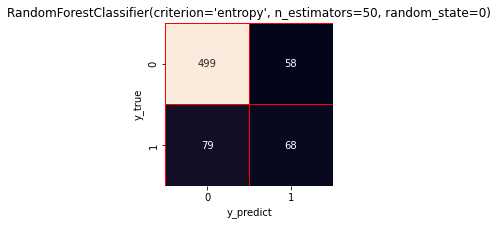

accuracy: 0.827
              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704



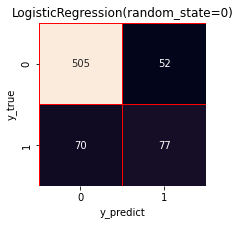

accuracy: 0.824
              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.60      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



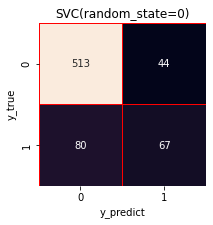

accuracy: 0.739
              precision    recall  f1-score   support

          No       0.86      0.80      0.83       557
         Yes       0.40      0.49      0.44       147

    accuracy                           0.74       704
   macro avg       0.63      0.65      0.63       704
weighted avg       0.76      0.74      0.75       704



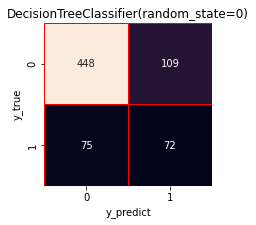

accuracy: 0.786
              precision    recall  f1-score   support

          No       0.87      0.86      0.86       557
         Yes       0.49      0.52      0.50       147

    accuracy                           0.79       704
   macro avg       0.68      0.69      0.68       704
weighted avg       0.79      0.79      0.79       704



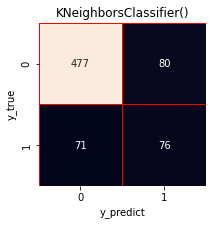

In [41]:
for model in models:
    classifier = model
    classifier.fit(X_train,y_train)
    preds=classifier.predict(X_test)
    y_pred = classifier.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score = metrics.accuracy_score(y_test,y_pred)
    print('accuracy: %0.3f' % score)
    print(classification_report(y_test,preds))
    
    
    f,ax = plt.subplots(figsize=(3,3))
    sns.heatmap(cm,annot=True,linewidths=0.5,cbar=False,linecolor="red",fmt='.0f',ax=ax)
    plt.xlabel("y_predict")
    plt.ylabel("y_true")
    ax.set(title=str(classifier))
    plt.show()
    metrices = metrices.append({'model': classifier,'score': score},ignore_index = True)
    

    

In [46]:
print(metrices)

                                               model     score
0  (DecisionTreeClassifier(criterion='entropy', m...  0.805398
1                 LogisticRegression(random_state=0)  0.826705
2                                SVC(random_state=0)  0.823864
3             DecisionTreeClassifier(random_state=0)  0.738636
4                             KNeighborsClassifier()  0.785511
